# California Housing Prices


**Nama :** Hadie Pratama Tulili

**NIM :** 2109106043

### Dataset yang digunakan
Dataset Harga Perumahan yang ada di California berdasarkan sensus data tahun 1990

[Link Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

### Import library

In [140]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Data Splitting

In [141]:
dataset_split = pd.read_csv("./dataset/housing_clean.csv")
dataset_split

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880.0,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099.0,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467.0,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274.0,235.0,558,219,5.6431,352100,NEAR BAY
4,-122.25,37.85,52,1627.0,280.0,565,259,3.8462,352100,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697.0,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254.0,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860.0,409.0,741,349,1.8672,84700,INLAND


In [142]:
dataset_split.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069259,0.099773,0.055310,-0.015176,-0.046230
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.143926
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105940
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134121
total_bedrooms,0.069259,-0.066658,-0.318998,0.927253,1.000000,0.873909,0.974725,-0.007682,0.049458
population,0.099773,-0.108785,-0.296244,0.857126,0.873909,1.000000,0.907222,0.004834,-0.024706
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065851
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.687890
median_house_value,-0.046230,-0.143926,0.105940,0.134121,0.049458,-0.024706,0.065851,0.687890,1.000000


In [143]:
dataset_split.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms           float64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

### Data Transforming
#### Normalisasi

In [144]:
from sklearn.preprocessing import MinMaxScaler

In [145]:
min_max_scaler = MinMaxScaler()

In [146]:
x_norm = min_max_scaler.fit_transform(dataset_split[["longitude"]])

In [147]:
data_norm = pd.DataFrame(x_norm)
data_norm

,0
0,0.211155
1,0.212151
2,0.210159
3,0.209163
4,0.209163
...,...
20635,0.324701
20636,0.312749
20637,0.311753
20638,0.301793


#### Standarisasi

In [148]:
print("Nilai Standar Deviasi sebelum distandarisasi : ")
print(np.std(dataset_split))

Nilai Standar Deviasi sebelum distandarisasi : 
longitude                  2.003483
latitude                   2.135901
housing_median_age        12.585253
total_rooms             2181.562402
total_bedrooms           419.256436
population              1132.434688
households               382.320491
median_income              1.899776
median_house_value    115412.607061
dtype: float64


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
standard_scaler = StandardScaler()

In [151]:
x_standard = standard_scaler.fit_transform(
    dataset_split[["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]]
)

In [152]:
print("Rata2 sesudah di standarisasi : ", np.nanmean(x_standard))
print("Nilai sesudah di standarisasi : ", np.nanstd(x_standard))

Rata2 sesudah di standarisasi :  -1.0428637568778732e-15
Nilai sesudah di standarisasi :  1.0


In [153]:
data_standarisasi = pd.DataFrame(x_standard)
data_standarisasi

,0,1,2,3,4,5,6,7,8
0,-1.327835,1.052548,0.982143,-0.804819,-0.975224,-0.974429,-0.977033,2.344766,2.129064
1,-1.322844,1.043185,-0.607019,2.045890,1.355092,0.861439,1.669961,2.332238,1.313728
2,-1.332827,1.038503,1.856182,-0.535746,-0.829728,-0.820777,-0.843637,1.782699,1.258275
3,-1.337818,1.038503,1.856182,-0.624215,-0.722395,-0.766028,-0.733781,0.932968,1.258275
4,-1.337818,1.038503,1.856182,-0.462404,-0.615063,-0.759847,-0.629157,-0.012881,1.258275
...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390856,-0.512592,-0.443449,-1.216128,-1.115816
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925135,-0.944405,-1.008420,-0.691593,-1.124480
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126102,-0.369537,-0.174042,-1.142593,-0.992779
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307375,-0.604429,-0.393753,-1.054583,-1.058630


### Data Cleaning

In [154]:
from sklearn.impute import SimpleImputer

In [155]:
dataset_split

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880.0,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099.0,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467.0,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274.0,235.0,558,219,5.6431,352100,NEAR BAY
4,-122.25,37.85,52,1627.0,280.0,565,259,3.8462,352100,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697.0,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254.0,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860.0,409.0,741,349,1.8672,84700,INLAND


### Menangani Nilai NULL

#### Subtitusi Nilai NULL (Scikit)

In [156]:
imputer = SimpleImputer(strategy='mean')

In [157]:
print("Jumlah record yang memiliki nilai null: ")
print(dataset_split.isna().sum())

Jumlah record yang memiliki nilai null: 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [158]:
dataset_split[dataset_split.isnull().any(axis = 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [159]:
dataset_split["total_bedrooms"] = imputer.fit_transform(dataset_split[["total_bedrooms"]])

In [160]:
print("Jumlah record yang memiliki nilai null: ")
print(dataset_split.isna().sum())

Jumlah record yang memiliki nilai null: 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [161]:
dataset_split[dataset_split.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


### Menangani Nilai Duplikat

In [162]:
dataset_split[dataset_split.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [163]:
dataset_split.drop_duplicates(inplace=True)

In [164]:
dataset_split[dataset_split.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [165]:
dataset_split.duplicated().sum()

0

### Mengubah tipe data angka menjadi tipe data objek

In [166]:
dataset_split.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms           float64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [167]:
dataset_split["total_rooms"] = dataset_split["total_rooms"].astype("float64")

In [168]:
dataset_split.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms           float64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

### Data Encoding
#### One-Hot Encoding

In [169]:
from sklearn.preprocessing import OneHotEncoder

In [170]:
onehot = dataset_split["ocean_proximity"].value_counts().rename_axis("ocean_proximity").reset_index(name="count")
czip = zip(onehot["ocean_proximity"])
cname = [nama_kategori[0] for nama_kategori in list(czip)]

In [171]:
df = pd.DataFrame(dataset_split["ocean_proximity"])
df

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [172]:
Onehot_Encoder = OneHotEncoder(sparse=False)

In [173]:
onehot = Onehot_Encoder.fit_transform(df[["ocean_proximity"]])

In [174]:
df_onehot = pd.DataFrame(onehot)

In [175]:
df_onehot.columns = cname

In [176]:
df = df.join(df_onehot)

In [177]:
df.head()

,ocean_proximity,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,NEAR BAY,0.0,0.0,0.0,1.0,0.0


### Data Splitting

In [178]:
dataset_split.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880.0,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099.0,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467.0,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274.0,235.0,558,219,5.6431,352100,NEAR BAY
4,-122.25,37.85,52,1627.0,280.0,565,259,3.8462,352100,NEAR BAY


In [179]:
X = np.array(dataset_split[['households']])
Y = np.array(dataset_split['total_bedrooms'])

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state=0)

## Linear Regression

In [180]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

prediction = model.predict(X_test)

In [181]:
print("Dimensi X_train : ", X_train.shape)  # type: ignore
print("Dimensi X_test  : ", X_test.shape)   # type: ignore
print("Dimensi y_train : ", Y_train.shape)  # type: ignore
print("Dimensi y_test  : ", Y_test.shape)   # type: ignore

Dimensi X_train :  (16512, 1)
Dimensi X_test  :  (4128, 1)
Dimensi y_train :  (16512,)
Dimensi y_test  :  (4128,)


In [182]:
model.score(X_test, Y_test)

0.9576622927156593

In [183]:
model.score(X_train, Y_train)

0.9482403351391762

## Visualisasi model Linear Regression

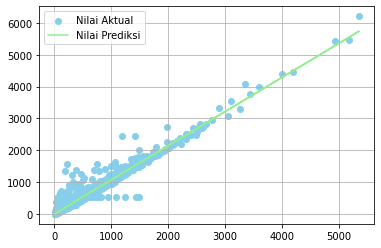

In [184]:
plt.scatter(X_test, Y_test, color="skyblue", label="Nilai Aktual")
plt.plot(X_test, prediction, color="lightgreen", label="Nilai Prediksi")

plt.legend()
plt.grid(True)
plt.show()

## Decission Tree Regressor

In [185]:
from sklearn.tree import DecisionTreeRegressor

In [186]:
modelDTR = DecisionTreeRegressor().fit(X_train, Y_train)

In [187]:
modelDTR.score(X_test, Y_test)

0.9219862943633165

In [188]:
modelDTR.score(X_test, Y_test)

0.9219862943633165

## Visualisasi model Decission Tree Regressor

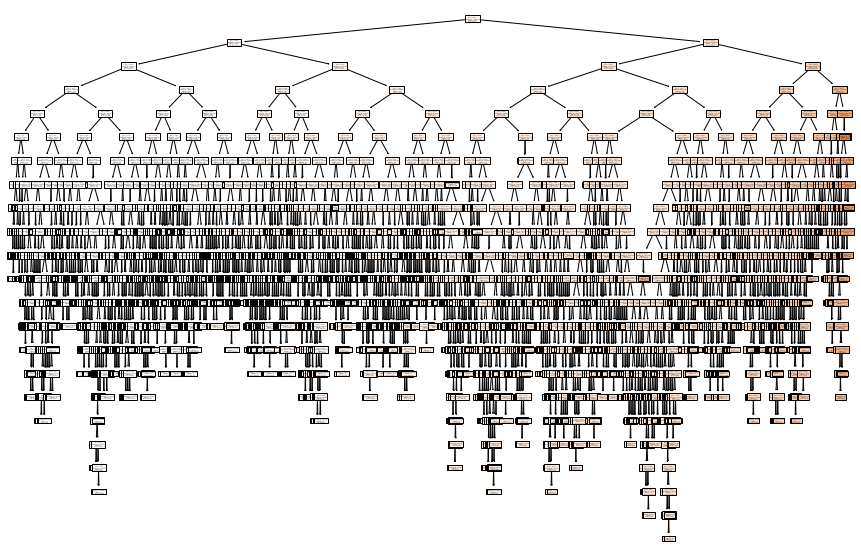

In [201]:
from sklearn import tree

y_predict = modelDTR.predict(X_test)

text_representation = tree.export_text(modelDTR)

fig = plt.figure(figsize=(15,10))
tree.plot_tree(modelDTR, filled=True)

plt.show()